## Load data


In [23]:
import pandas as pd

train_df = pd.read_csv('/content/train_data.csv')
valid_df = pd.read_csv('/content/valid_data.csv')

display(train_df.head())
display(valid_df.head())

,text,label
0,Here are Thursday's biggest analyst calls: App...,0
1,Buy Las Vegas Sands as travel to Singapore bui...,0
2,"Piper Sandler downgrades DocuSign to sell, cit...",0
3,"Analysts react to Tesla's latest earnings, bre...",0
4,Netflix and its peers are set for a ‘return to...,0


,text,label
0,Analyst call of the day for @CNBCPro subscribe...,0
1,"Loop upgrades CSX to buy, says it's a good pla...",0
2,BofA believes we're already in a recession — a...,0
3,JPMorgan sees these derivative plays as best w...,0
4,Morgan Stanley's Huberty sees Apple earnings m...,0


## Explore data


In [24]:
print("First 5 rows of train_df:")
display(train_df.head())

print("\nFirst 5 rows of valid_df:")
display(valid_df.head())

print("\nData types of train_df:")
print(train_df.dtypes)

print("\nData types of valid_df:")
print(valid_df.dtypes)

print("\nMissing values in train_df:")
print(train_df.isnull().sum())

print("\nMissing values in valid_df:")
print(valid_df.isnull().sum())

print("\nNumber of duplicate rows in train_df:")
print(train_df.duplicated().sum())

print("\nNumber of duplicate rows in valid_df:")
print(valid_df.duplicated().sum())

First 5 rows of train_df:


,text,label
0,Here are Thursday's biggest analyst calls: App...,0
1,Buy Las Vegas Sands as travel to Singapore bui...,0
2,"Piper Sandler downgrades DocuSign to sell, cit...",0
3,"Analysts react to Tesla's latest earnings, bre...",0
4,Netflix and its peers are set for a ‘return to...,0



First 5 rows of valid_df:


,text,label
0,Analyst call of the day for @CNBCPro subscribe...,0
1,"Loop upgrades CSX to buy, says it's a good pla...",0
2,BofA believes we're already in a recession — a...,0
3,JPMorgan sees these derivative plays as best w...,0
4,Morgan Stanley's Huberty sees Apple earnings m...,0



Data types of train_df:
text     object
label     int64
dtype: object

Data types of valid_df:
text     object
label     int64
dtype: object

Missing values in train_df:
text     0
label    0
dtype: int64

Missing values in valid_df:
text     0
label    0
dtype: int64

Number of duplicate rows in train_df:
0

Number of duplicate rows in valid_df:
0


## Clean data


In [25]:
print("Missing values in train_df:")
print(train_df.isnull().sum())

print("\nMissing values in valid_df:")
print(valid_df.isnull().sum())

# There were no missing values found during the exploration phase, so no cleaning is needed for this step.

Missing values in train_df:
text     0
label    0
dtype: int64

Missing values in valid_df:
text     0
label    0
dtype: int64


## Analyze data


Descriptive statistics for 'label' in train_df:


,label
count,16990.000000
mean,9.547616
std,6.401000
min,0.000000
25%,2.000000
50%,9.000000
75%,16.000000
max,19.000000



Value counts for 'label' in train_df:


,count
label,
2,3545
18,2118
14,1822
9,1557
5,987
16,985
1,837
19,823
7,624



Descriptive statistics for 'label' in valid_df:


,label
count,4117.000000
mean,9.488220
std,6.448169
min,0.000000
25%,2.000000
50%,9.000000
75%,16.000000
max,19.000000



Value counts for 'label' in valid_df:


,count
label,
2,852
18,528
14,415
9,336
16,249
5,242
1,214
19,197
7,160


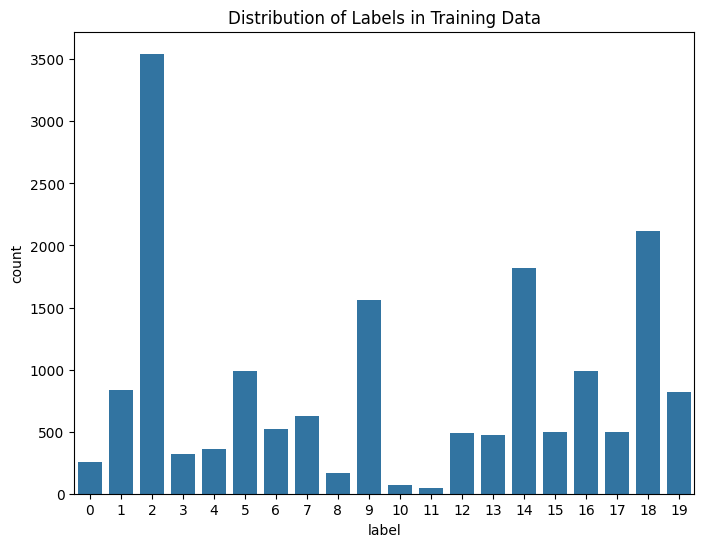

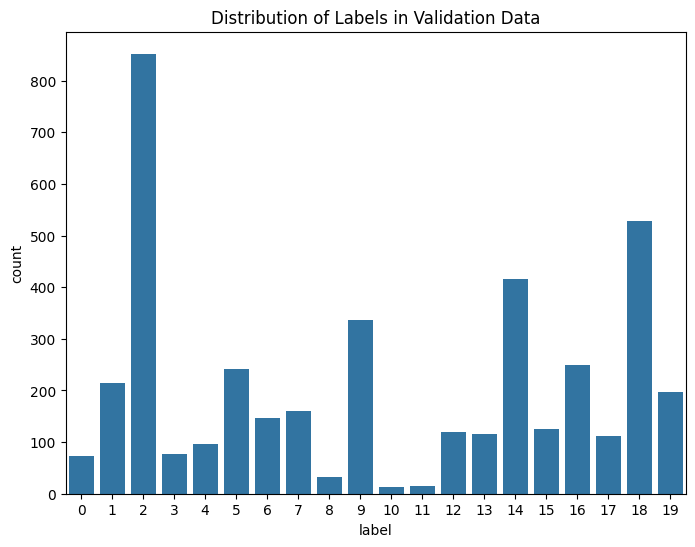

In [26]:
print("Descriptive statistics for 'label' in train_df:")
display(train_df['label'].describe())

print("\nValue counts for 'label' in train_df:")
display(train_df['label'].value_counts())

print("\nDescriptive statistics for 'label' in valid_df:")
display(valid_df['label'].describe())

print("\nValue counts for 'label' in valid_df:")
display(valid_df['label'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=train_df)
plt.title('Distribution of Labels in Training Data')
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=valid_df)
plt.title('Distribution of Labels in Validation Data')
plt.show()

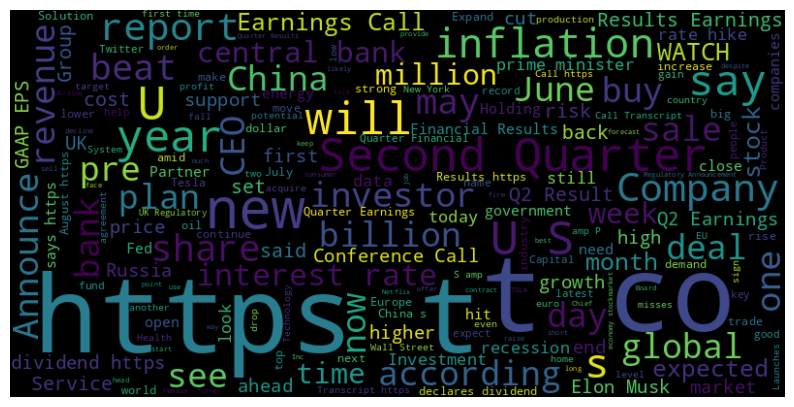

In [27]:
# WORD CLOUD

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all text data into a single string for the word cloud
all_text = ' '.join(train_df['text'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Feature Engineering

In [28]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

train_df['text'] = train_df['text'].apply(clean_text)
valid_df['text'] = valid_df['text'].apply(clean_text)

display(train_df.head())
display(valid_df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label
0,thursday biggest analyst call appl amazon tesl...,0
1,buy la vega sand travel singapor build well fa...,0
2,piper sandler downgrad docusign sell cite elev...,0
3,analyst react tesla latest earn break what nex...,0
4,netflix peer set return growth analyst say giv...,0


,text,label
0,analyst call day cnbcpro subscrib goldman sach...,0
1,loop upgrad csx buy say good place park money ...,0
2,bofa believ alreadi recess say stock take beat...,0
3,jpmorgan see deriv play best way bet electr ve...,0
4,morgan stanley huberti see appl earn miss say ...,0


## Tokenization


In [29]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

train_df['tokens'] = train_df['text'].apply(word_tokenize)
valid_df['tokens'] = valid_df['text'].apply(word_tokenize)

display(train_df.head())
display(valid_df.head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,text,label,tokens
0,thursday biggest analyst call appl amazon tesl...,0,"[thursday, biggest, analyst, call, appl, amazo..."
1,buy la vega sand travel singapor build well fa...,0,"[buy, la, vega, sand, travel, singapor, build,..."
2,piper sandler downgrad docusign sell cite elev...,0,"[piper, sandler, downgrad, docusign, sell, cit..."
3,analyst react tesla latest earn break what nex...,0,"[analyst, react, tesla, latest, earn, break, w..."
4,netflix peer set return growth analyst say giv...,0,"[netflix, peer, set, return, growth, analyst, ..."


,text,label,tokens
0,analyst call day cnbcpro subscrib goldman sach...,0,"[analyst, call, day, cnbcpro, subscrib, goldma..."
1,loop upgrad csx buy say good place park money ...,0,"[loop, upgrad, csx, buy, say, good, place, par..."
2,bofa believ alreadi recess say stock take beat...,0,"[bofa, believ, alreadi, recess, say, stock, ta..."
3,jpmorgan see deriv play best way bet electr ve...,0,"[jpmorgan, see, deriv, play, best, way, bet, e..."
4,morgan stanley huberti see appl earn miss say ...,0,"[morgan, stanley, huberti, see, appl, earn, mi..."


## Vectorization


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

train_df['text_cleaned'] = train_df['tokens'].apply(lambda tokens: ' '.join(tokens))
valid_df['text_cleaned'] = valid_df['tokens'].apply(lambda tokens: ' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['text_cleaned'])
X_valid_tfidf = tfidf_vectorizer.transform(valid_df['text_cleaned'])

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_valid_tfidf:", X_valid_tfidf.shape)

Shape of X_train_tfidf: (16990, 36752)
Shape of X_valid_tfidf: (4117, 36752)


## Prepare for modeling



In [31]:
X_train = X_train_tfidf
y_train = train_df['label']
X_valid = X_valid_tfidf
y_valid = valid_df['label']

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_valid:", X_valid.shape)
print("Shape of y_valid:", y_valid.shape)

Shape of X_train: (16990, 36752)
Shape of y_train: (16990,)
Shape of X_valid: (4117, 36752)
Shape of y_valid: (4117,)


#Data Splitting

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# The data is already split into X_train_tfidf, X_valid_tfidf, y_train, and y_valid
# We can directly use these for training and validation

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_valid_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7782365800340053
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.36      0.52        73
           1       0.81      0.75      0.78       214
           2       0.68      0.91      0.78       852
           3       0.96      0.56      0.70        77
           4       0.99      0.93      0.96        97
           5       0.89      0.92      0.90       242
           6       0.80      0.72      0.76       146
           7       0.86      0.75      0.80       160
           8       0.87      0.41      0.55        32
           9       0.71      0.69      0.70       336
          10       0.29      0.15      0.20        13
          11       1.00      0.29      0.44        14
          12       0.93      0.65      0.76       119
          13       0.87      0.47      0.61       116
          14       0.74      0.81      0.77       415
          15       0.86      0.64      0.73       125
          16       0.93      

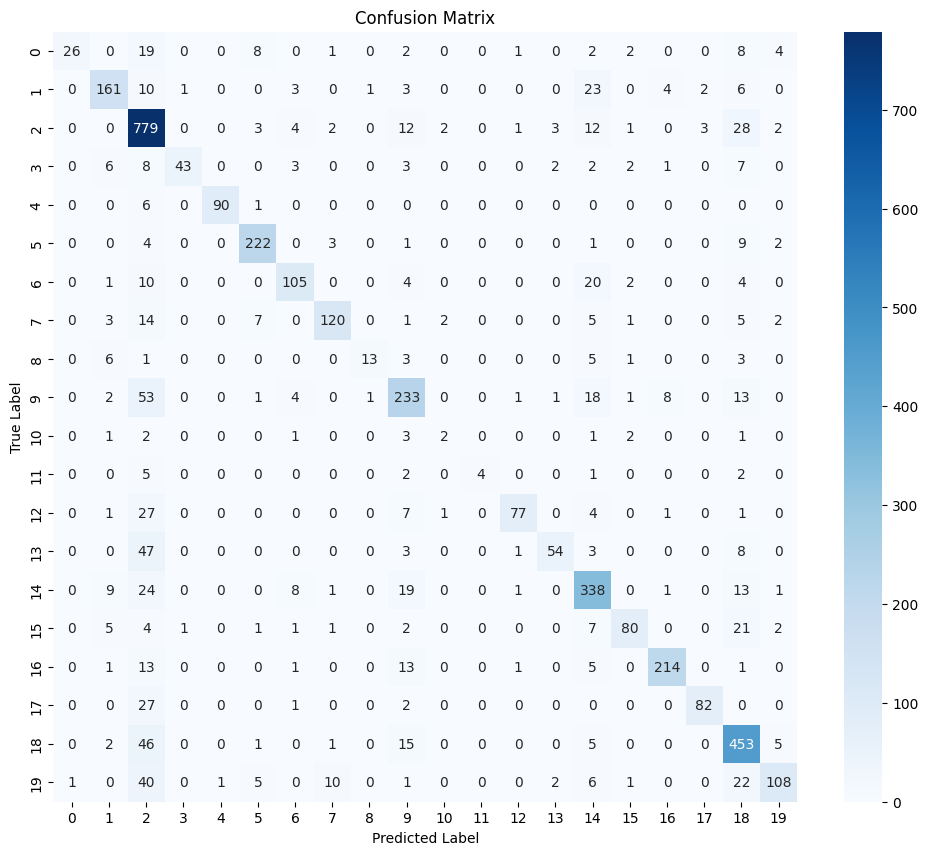

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_valid, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Visualize model performance beyond confusion matrix



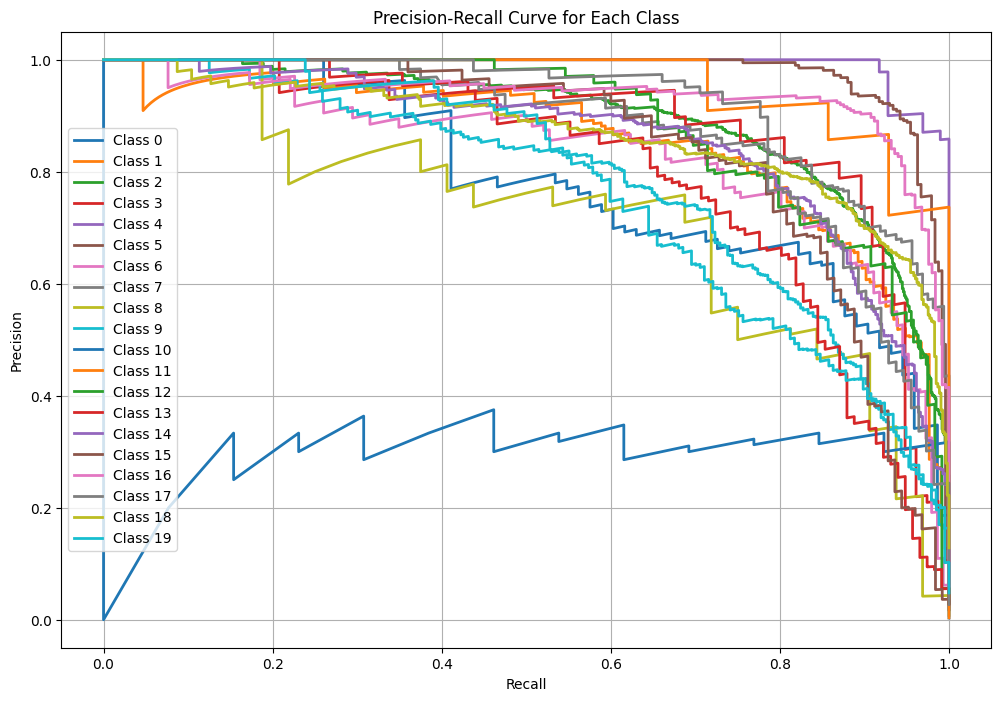

In [40]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_valid_bin = label_binarize(y_valid, classes=model.classes_)
n_classes = y_valid_bin.shape[1]

# Get predicted probabilities
y_score = model.predict_proba(X_valid)

plt.figure(figsize=(12, 8))

# Plot precision-recall curve for each class
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_valid_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {i}')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Each Class")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Visualize the feature space

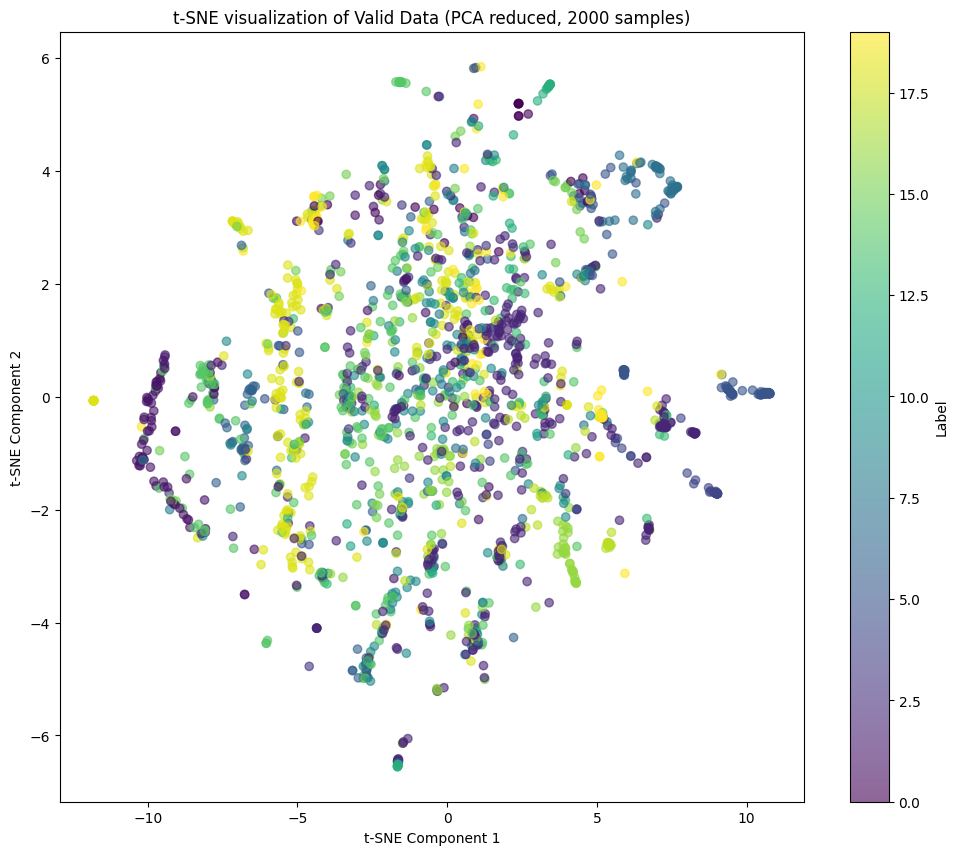

In [41]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Filter out the specific FutureWarning from sklearn.manifold._t_sne
warnings.filterwarnings("ignore", message="'n_iter' was renamed to 'max_iter'", category=FutureWarning)


# Apply PCA
pca = PCA(n_components=50, random_state=42)
X_valid_pca = pca.fit_transform(X_valid_tfidf.toarray()) # Convert sparse matrix to dense array

# Sample a smaller subset for t-SNE to make it faster
sample_size = 2000 # You can adjust this number
if X_valid_pca.shape[0] > sample_size:
    sample_indices = np.random.choice(X_valid_pca.shape[0], size=sample_size, replace=False)
    X_valid_pca_sample = X_valid_pca[sample_indices]
    y_valid_sample = y_valid.iloc[sample_indices]
else:
    X_valid_pca_sample = X_valid_pca
    y_valid_sample = y_valid

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_valid_tsne = tsne.fit_transform(X_valid_pca_sample)

# Create scatter plot
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_valid_tsne[:, 0], X_valid_tsne[:, 1], c=y_valid_sample, cmap='viridis', alpha=0.6)
plt.title(f't-SNE visualization of Valid Data (PCA reduced, {X_valid_pca_sample.shape[0]} samples)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Label')
plt.show()

## Summary of Work

We have completed the following steps:

1.  **Data Loading and Exploration**: Loaded `train_data.csv` and `valid_data.csv` into pandas DataFrames. Explored the data, checked data types, missing values, and duplicates. Found no missing values or duplicates.
2.  **Data Cleaning**: Confirmed no missing values or duplicates were present, so no specific cleaning steps were needed for this.
3.  **Feature Engineering**: Cleaned the text data by converting to lowercase, removing punctuation, numbers, stop words, and applying stemming. Tokenized the cleaned text and vectorized it using TF-IDF.
4.  **Model Training (Logistic Regression)**: Trained a Logistic Regression model on the TF-IDF vectorized training data.
5.  **Model Evaluation and Visualization (Logistic Regression)**: Evaluated the Logistic Regression model using accuracy and a classification report. Visualized the performance with a confusion matrix and precision-recall curves.
6.  **Advanced Modeling Attempt (BERT)**: Started the process of training a BERT model using Hugging Face transformers, including installing libraries, loading the tokenizer and model, and preparing the data. The training process was interrupted.

**Key Findings So Far:**

*   The datasets are clean with no missing values or duplicates.
*   The label distribution is imbalanced in both training and validation sets.
*   The Logistic Regression model provided a baseline performance, with a reported accuracy of 0.778 on the validation set. The confusion matrix and precision-recall curves provided more detailed insights into the per-class performance.
*   The attempt to train a BERT model was interrupted.